In [1]:
import pandas
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import tree

# Especificando a URL da base de dados
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data"

#definindo os nomes de cada coluna
names = [ 'Id number', 'efractive index', 'Magnesium', 'Aluminum', 'Silicon', 
          'Potassium', 'Calcium', 'Barium', 'Iron', 'class'] 

#Fazendo o carregamento dos dados diretamente do UCI Machine Learning          
dataset = pandas.read_csv(url, names=names)

print("Apresentando o shape dos dados (dimenssoes)")
print(dataset.shape)

#remove a primeira coluna que contem o indice
dataset.drop([dataset.columns[0]], axis=1, inplace=True)

print("Apresentando o shape dos dados (dimenssoes)")
print(dataset.shape)

print("Conhecendo a distribuicao dos dados por classes (class distribution)")
print(dataset.groupby('class').size())

X = dataset.values[:, 0:8]
Y = dataset.values[:,8]

# usando o metodo para fazer uma unica divisao dos dados
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.25, random_state = 10)

#criando a base de dados da validacao
X_train, X_valid, y_train, y_valid = train_test_split( X_train, y_train, test_size = 0.25, random_state = 10)

#definindo o k-fold estratificado
kfold = model_selection.StratifiedKFold(n_splits=10, random_state=10)

# realizando a variacao de parametros dos modelos
#avalidando a configuracao no k-fold
clf = tree.DecisionTreeClassifier(criterion='entropy',random_state=10)
results = model_selection.cross_val_score(clf, X_train, y_train, cv=kfold)
print("Desempenho Kfold modelo-1: %0.3f" %  results.mean())

#avalidando a configuracao no k-fold
clf2 = tree.DecisionTreeClassifier(random_state=10)
results = model_selection.cross_val_score(clf2, X_train, y_train, cv=kfold)
print("Desempenho Kfold modelo-2: %0.3f" %  results.mean())

#treinando o modelo escolhido
clf = clf.fit(X_train, y_train)

#relatorios do treinamento
Y_train_prediction = clf.predict(X_train)
print("Train Clasification report:")
print(classification_report(y_train, Y_train_prediction))
print("Train Confussion matrix:")
print(confusion_matrix(y_train, Y_train_prediction))

#relatorios da validacao
Y_valid_prediction = clf.predict(X_valid)
print("Valid Clasification report:")
print(classification_report(y_valid, Y_valid_prediction))
print("Valid Confussion matrix:")
print(confusion_matrix(y_valid, Y_valid_prediction))

#relatorio do teste - apenas apos a definicao dos parametros do modelo
Y_test_prediction = clf.predict(X_test)
print("Test Clasification report:")
print(classification_report(y_test, Y_test_prediction))
print("Test Confussion matrix:")
print(confusion_matrix(y_test, Y_test_prediction))

print("Train Acuracia: %0.3f" %  clf.score(X_train, y_train))
print("Valid Acuracia: %0.3f" %  clf.score(X_valid, y_valid))
print("Test Acuracia: %0.3f" %  clf.score(X_test, y_test))

Apresentando o shape dos dados (dimenssoes)
(214, 10)
Apresentando o shape dos dados (dimenssoes)
(214, 9)
Conhecendo a distribuicao dos dados por classes (class distribution)
class
1    70
2    76
3    17
5    13
6     9
7    29
dtype: int64
Desempenho Kfold modelo-1: 0.742
Desempenho Kfold modelo-2: 0.767
Train Clasification report:
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        39
         2.0       1.00      1.00      1.00        45
         3.0       1.00      1.00      1.00         9
         5.0       1.00      1.00      1.00         7
         6.0       1.00      1.00      1.00         4
         7.0       1.00      1.00      1.00        16

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

Train Confussion matrix:
[[39  0  0  0  0  0]
 [ 0 45  0  0  0  0]
 [ 0  0  9  0  0  0]
 [ 0  0  0  7  0  0]
 [ 0  0  0 

In [2]:
# Significance stats tests
from numpy.random import seed
from numpy.random import randn
from scipy.stats import mannwhitneyu
from scipy.stats import friedmanchisquare
from scipy.stats import kruskal
from scipy.stats import wilcoxon
# seed the random number generator
seed(1)
# generate three independent samples
data1 = 5 * randn(100) + 50
data2 = 5 * randn(100) + 50
data3 = 5 * randn(100) + 52

# compare samples
stat, p = mannwhitneyu(data1, data2)
print('Mann-Whitney Statistic: s=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

stat, p = wilcoxon(data1, data2)
print('Wilcoxon Statistic: s=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

stat, p = kruskal(data1, data2, data3)
print('Kruskal-Wallis Statistic: s=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

stat, p = friedmanchisquare(data1, data2, data3)
print('Friedman Statistic: s=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Mann-Whitney Statistic: s=4597.000, p=0.163
Same distributions (fail to reject H0)
Wilcoxon Statistic: s=2314.000, p=0.468
Same distributions (fail to reject H0)
Kruskal-Wallis Statistic: s=6.051, p=0.049
Different distributions (reject H0)
Friedman Statistic: s=9.360, p=0.009
Different distributions (reject H0)


Apresentando o shape dos dados (dimenssoes)
(214, 10)
Apresentando o shape dos dados (dimenssoes)
(214, 9)
Conhecendo a distribuicao dos dados por classes (class distribution)
class
1    70
2    76
3    17
5    13
6     9
7    29
dtype: int64
=================================Desempenhos KFold=================================
Arvore: 0.612500 (0.103833)
ComiteArvore: 0.718750 (0.125779)
RedeNeural: 0.337500 (0.030619)
ComiteRede: 0.587500 (0.101550)
=================================Teste de Hipotese=================================
Different distributions (reject H0)
Comparison stats 25.902020009528375
=================================Teste de Hipotese Pareado=================================
Comparacao Arvore | ComiteArvore -> KruskalResult(statistic=4.331821735731041, pvalue=0.03740619046313662)
Comparacao Arvore | RedeNeural -> KruskalResult(statistic=14.92537313432835, pvalue=0.00011184851477895884)
Comparacao Arvore | CRNA -> KruskalResult(statistic=0.5932864949258371, pvalue=0.441

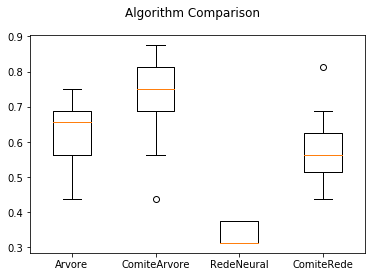

In [3]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import model_selection
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
#from statsmodels.stats.contingency_tables import mcnemar

seed = 7
# Especificando a URL da base de dados
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data"

#definindo os nomes de cada coluna
names = [ 'Id number', 'efractive index', 'Magnesium', 'Aluminum', 'Silicon', 
          'Potassium', 'Calcium', 'Barium', 'Iron', 'class'] 

#Fazendo o carregamento dos dados diretamente do UCI Machine Learning          
dataset = pandas.read_csv(url, names=names)

print("Apresentando o shape dos dados (dimenssoes)")
print(dataset.shape)

#remove a primeira coluna que contem o indice
dataset.drop([dataset.columns[0]], axis=1, inplace=True)

print("Apresentando o shape dos dados (dimenssoes)")
print(dataset.shape)

print("Conhecendo a distribuicao dos dados por classes (class distribution)")
print(dataset.groupby('class').size())

X = dataset.values[:, 0:8]
Y = dataset.values[:,8]

# usando o metodo para fazer uma unica divisao dos dados
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.25, random_state = seed)
kfold = model_selection.StratifiedKFold(n_splits=10, random_state=seed)

# prepare configuration for cross validation test harness
# prepare models
RFC = RandomForestClassifier(n_estimators=10,random_state=seed)
DTC = tree.DecisionTreeClassifier(criterion='entropy', random_state=seed)
MLP = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,5), random_state=seed)
BMLP = BaggingClassifier(base_estimator=MLP, n_estimators=10, random_state=seed)

models = []
models.append(('Arvore', DTC))
models.append(('ComiteArvore', RFC))
models.append(('RedeNeural', MLP))
models.append(('ComiteRede', BMLP))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'

kfold = model_selection.StratifiedKFold(n_splits=10, random_state=seed)

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=seed)

print("=================================Desempenhos KFold=================================")
for name, model in models:
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

# Teste de hipotese analisando o p-value
print("=================================Teste de Hipotese=================================")
stat, p = stats.kruskal(results[0],results[1],results[2],results[3])
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')
print('Comparison stats', stat)
print("=================================Teste de Hipotese Pareado=================================")
print('Comparacao Arvore | ComiteArvore ->', stats.kruskal(results[0],results[1]))
print('Comparacao Arvore | RedeNeural ->',stats.kruskal(results[0],results[2]))
print('Comparacao Arvore | CRNA ->',stats.kruskal(results[0],results[3]))
print('Comparacao ComiteArvore | RedeNeural ->',stats.kruskal(results[1],results[2]))
print('Comparacao ComiteArvore | ComiteRede ->',stats.kruskal(results[1],results[3]))
print('Comparacao RedeNeural | ComiteRede ->',stats.kruskal(results[2],results[3]))	

RFC.fit(X_train, y_train);
DTC.fit(X_train, y_train);
MLP.fit(X_train, y_train);
BMLP.fit(X_train, y_train);

Y_test_prediction_RFC = RFC.predict(X_test)
Y_test_prediction_DTC = DTC.predict(X_test)
Y_test_prediction_MLP = MLP.predict(X_test)
Y_test_prediction_BMLP = BMLP.predict(X_test)

print("=================================Acuracia Arvore=================================")
print("Treinamento",  RFC.score(X_train, y_train)," Teste" ,DTC.score(X_test, y_test))
print("Clasification report:")
print(classification_report(y_test, Y_test_prediction_DTC))
print("Confussion matrix:")
print(confusion_matrix(y_test, Y_test_prediction_DTC))

print("=================================Comite de Arvore=================================")
print("Treinamento",  DTC.score(X_train, y_train)," Teste" ,RFC.score(X_test, y_test))
print("Clasification report:")
print(classification_report(y_test, Y_test_prediction_RFC))
print("Confussion matrix:")
print(confusion_matrix(y_test, Y_test_prediction_RFC))

print("=================================Rede Neural=================================")
print("Treinamento",  MLP.score(X_train, y_train)," Teste" ,MLP.score(X_test, y_test))
print("Clasification report:")
print(classification_report(y_test, Y_test_prediction_MLP))
print("Confussion matrix:")
print(confusion_matrix(y_test, Y_test_prediction_MLP))

print("=================================Comite de Redes Neurais=================================")
print("Treinamento",  BMLP.score(X_train, y_train)," Teste" ,BMLP.score(X_test, y_test))
print("Clasification report:")
print(classification_report(y_test, Y_test_prediction_BMLP))
print("Confussion matrix:")
print(confusion_matrix(y_test, Y_test_prediction_BMLP))

fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()	
